In [1]:
import numpy as np                               
import pandas as pd                        
import matplotlib.pyplot as plt                             
import tensorflow as tf                          
from PIL import Image                           
import os                                        
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical          
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import tqdm                                    
import warnings

In [2]:
data = []
labels = []
classes = 43

for i in range(classes):
    path = os.path.join(os.getcwd(),'Train',str(i))
    #print(path)
    images = os.listdir(path)
    #print(images)
    
    for j in images:
        try:
            image = Image.open(path + '\\'+ j)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
#Converting lists into numpy arrays bcoz its faster and takes lesser #memory
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=68)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [4]:
y_train = to_categorical(y_train,43)
y_test = to_categorical(y_test,43)

In [5]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0

In [7]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [8]:
history = model.fit(X_train, y_train, batch_size=32, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 79s 80ms/step - loss: 1.7678 - acc: 0.5490 - val_loss: 0.3701 - val_acc: 0.9024
Epoch 2/15
981/981 [==============================] - 78s 80ms/step - loss: 0.5737 - acc: 0.8432 - val_loss: 0.1516 - val_acc: 0.9589
Epoch 3/15
981/981 [==============================] - 81s 82ms/step - loss: 0.4174 - acc: 0.8953 - val_loss: 0.1110 - val_acc: 0.9688
Epoch 4/15
981/981 [==============================] - 79s 80ms/step - loss: 0.3977 - acc: 0.9073 - val_loss: 0.1045 - val_acc: 0.9753
Epoch 5/15
981/981 [==============================] - 79s 81ms/step - loss: 0.4109 - acc: 0.9105 - val_loss: 0.2535 - val_acc: 0.9436
Epoch 6/15
981/981 [==============================] - 79s 80ms/step - loss: 0.4223 - acc: 0.9097 - val_loss: 0.1381 - val_acc: 0.9666
Epoch 7/15
981/981 [==============================] - 81s 83ms/step - loss: 0.4558 - acc: 0.9083 - val_loss: 0.1537 - val_acc: 0.9666
Epoch 8/15
981/981 [==============================] - 80s 82ms

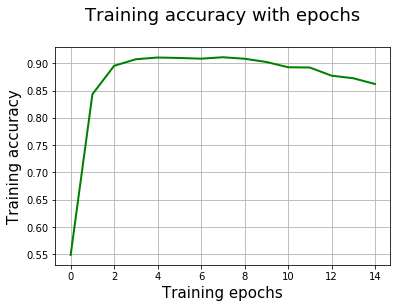

In [15]:
plt.plot(history.history['acc'],c='g',lw=2)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.show()

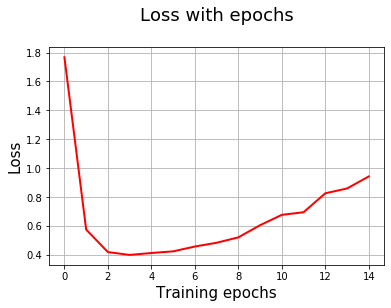

In [14]:
plt.plot(history.history['loss'],c='r',lw=2)
plt.grid(True)
plt.title("Loss with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Loss",fontsize=15)
plt.show()

In [16]:
model.save("Traffic_signs_model.h5")


In [17]:
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('TestSigns.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = np.argmax(model.predict(X_test), axis=-1)
#print(pred)
#Accuracy with the test data
print('accuracy_score is : ',accuracy_score(labels, pred))

accuracy_score is :  0.8863024544734759
